# Week 2 – Sales Data Analysis using Python


In [1]:
import pandas as pd
import numpy as np


## Dataset Creation
This section creates a structured sales dataset containing order details,
product name, category, quantity, price, and order date.


In [2]:
np.random.seed(42)

products = [
    ("Laptop", "Electronics", 55000),
    ("Mouse", "Electronics", 500),
    ("Keyboard", "Electronics", 1500),
    ("Monitor", "Electronics", 15000),
    ("Printer", "Electronics", 22000),
    ("Desk", "Furniture", 18000),
    ("Office Chair", "Furniture", 12000),
    ("Notebook", "Stationery", 100),
    ("Pen Pack", "Stationery", 20),
    ("File Folder", "Stationery", 30)
]

data = []

for i in range(1, 51):
    product, category, price = products[np.random.randint(0, len(products))]
    quantity = np.random.randint(1, 10)
    order_date = pd.to_datetime("2024-01-01") + pd.to_timedelta(np.random.randint(0, 90), unit="D")

    data.append([1000 + i, order_date, product, category, quantity, price])

df = pd.DataFrame(data, columns=[
    "order_id", "order_date", "product_name",
    "category", "quantity", "unit_price"
])

df.head()


,order_id,order_date,product_name,category,quantity,unit_price
0,1001,2024-01-15,Office Chair,Furniture,4,12000
1,1002,2024-03-23,Notebook,Stationery,5,100
2,1003,2024-01-24,Office Chair,Furniture,8,12000
3,1004,2024-02-22,Keyboard,Electronics,6,1500
4,1005,2024-01-30,Mouse,Electronics,8,500


## Revenue Calculation
Total sales amount is calculated for each order by multiplying quantity
with unit price.


In [3]:
df["total_amount"] = df["quantity"] * df["unit_price"]
df.head()


,order_id,order_date,product_name,category,quantity,unit_price,total_amount
0,1001,2024-01-15,Office Chair,Furniture,4,12000,48000
1,1002,2024-03-23,Notebook,Stationery,5,100,500
2,1003,2024-01-24,Office Chair,Furniture,8,12000,96000
3,1004,2024-02-22,Keyboard,Electronics,6,1500,9000
4,1005,2024-01-30,Mouse,Electronics,8,500,4000


## Overall Sales Summary
This section calculates overall revenue and total number of orders.


In [4]:
total_revenue = df["total_amount"].sum()
total_orders = df["order_id"].nunique()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)


Total Revenue: 2636170
Total Orders: 50


## Sales Analysis
This section analyzes sales performance by product, category,
and month to identify trends and patterns.


In [5]:
df.groupby("product_name")["total_amount"].sum().sort_values(ascending=False)


,total_amount
product_name,
Office Chair,864000
Laptop,770000
Printer,484000
Monitor,435000
Desk,36000
Mouse,26000
Keyboard,18000
Notebook,2100
File Folder,870


In [6]:
df.groupby("category")["total_amount"].sum()


,total_amount
category,
Electronics,1733000
Furniture,900000
Stationery,3170


In [7]:
df["month"] = df["order_date"].dt.month
df.groupby("month")["total_amount"].sum()


,total_amount
month,
1,498210
2,809990
3,1327970


Business Summary:

The analysis indicates that Electronics is the highest revenue-generating category,
with laptops and monitors contributing the most to overall sales. Stationery products
have lower revenue but consistent order volumes, indicating stable demand. Monthly
sales trends show steady performance with no sharp declines, suggesting reliable
customer purchasing behavior. These insights can help the business prioritize
high-value products while maintaining inventory for frequently purchased items.



In [8]:
df.to_csv("week2_sales_analysis_output.csv", index=False)


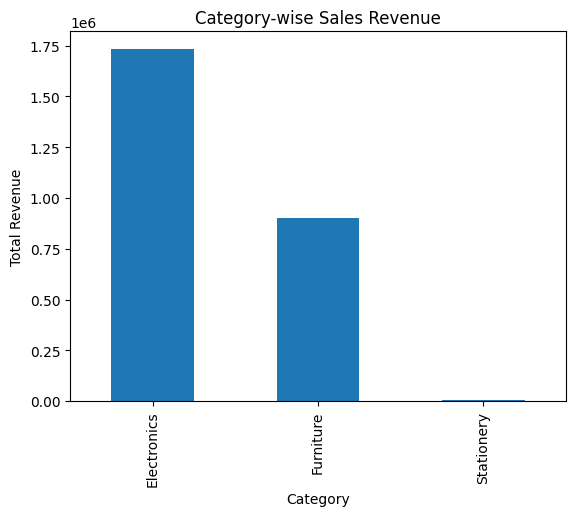

In [9]:
import matplotlib.pyplot as plt

category_sales = df.groupby("category")["total_amount"].sum()

category_sales.plot(kind="bar")
plt.title("Category-wise Sales Revenue")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()


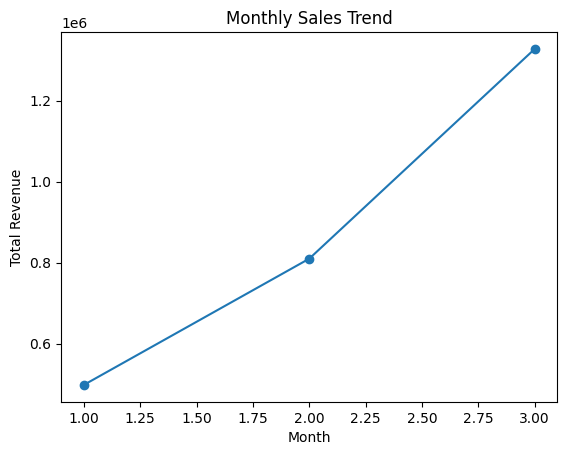

In [10]:
monthly_sales = df.groupby("month")["total_amount"].sum()

monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


In [11]:
product_sales = df.groupby("product_name")["total_amount"].sum().sort_values(ascending=False)

top_product = product_sales.idxmax()
low_product = product_sales.idxmin()

print("Top Performing Product:", top_product)
print("Lowest Performing Product:", low_product)


Top Performing Product: Office Chair
Lowest Performing Product: Pen Pack


In [12]:
print("Missing values in dataset:")
df.isnull().sum()


Missing values in dataset:


,0
order_id,0
order_date,0
product_name,0
category,0
quantity,0
unit_price,0
total_amount,0
month,0


## Data Export
The final processed dataset is exported as a CSV file for reporting
and submission.


In [13]:
df_sorted = df.sort_values(by="total_amount", ascending=False)
df_sorted.to_csv("week2_sales_analysis_output.csv", index=False)
